In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv('Bangalore.csv')
Data.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
numpy.random.seed(7)

In [ ]:
Data.drop('Location',axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

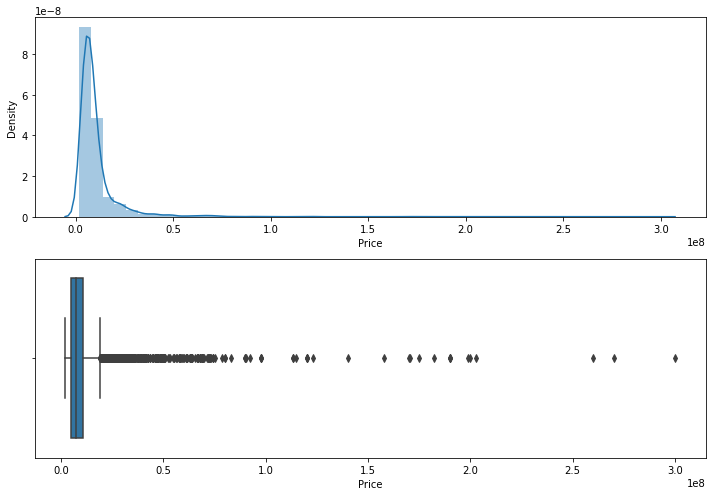

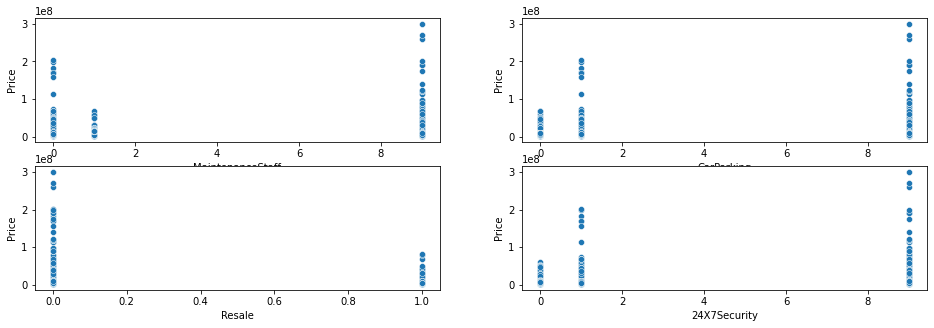

In [ ]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['Price'])
plt.tight_layout()

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['MaintenanceStaff'], Data['Price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['CarParking'],Data['Price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['Resale'],Data['Price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['24X7Security'],Data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

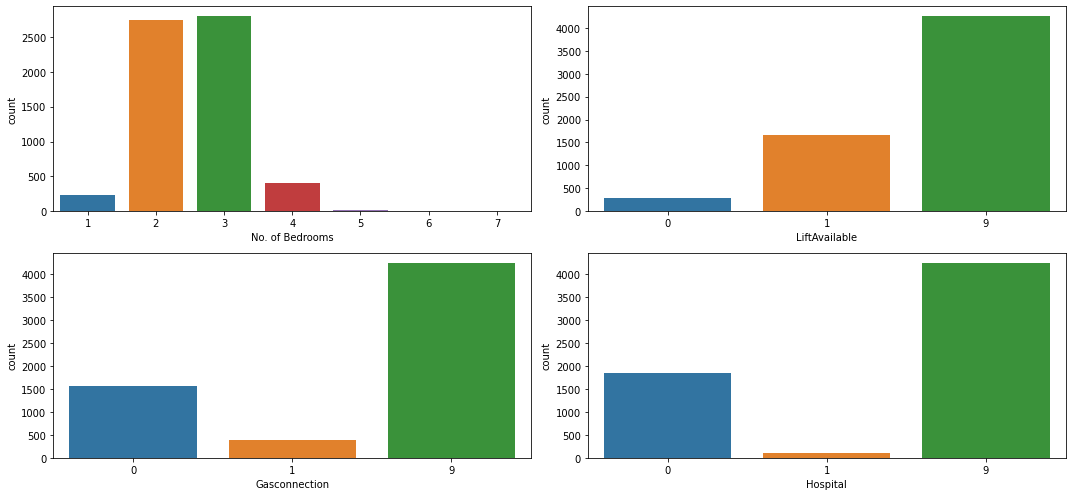

In [ ]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['No. of Bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(Data['LiftAvailable'])
fig.add_subplot(2,2,3)
sns.countplot(Data['Gasconnection'])
fig.add_subplot(2,2,4)
sns.countplot(Data['Hospital'])
plt.tight_layout()

In [ ]:
Data


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,4,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,2,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,3,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 8.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.ensemble import IsolationForest # Outlier Detection
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch # HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore') # To ignore warnings.

In [ ]:
missing_values = Data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(Data)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values


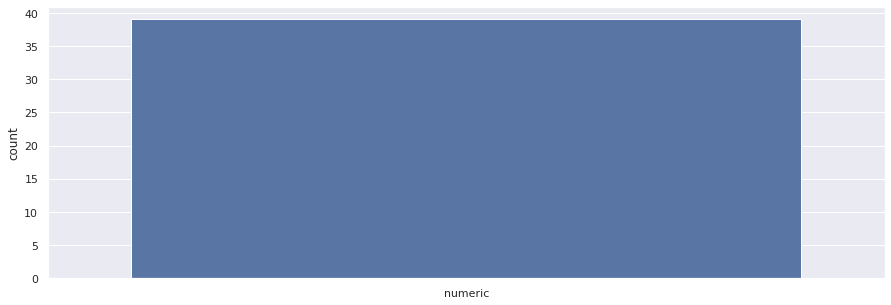

In [ ]:
column_data_type = []
for col in Data.columns:
    data_type = Data[col].dtype
    if Data[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(15,5))
sns.countplot(x=column_data_type)
plt.show()

In [ ]:
Data.size


242073

In [ ]:
Data

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,4,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,2,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,3,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,1,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
Data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Price                6207 non-null   int64
 1   Area                 6207 non-null   int64
 2   No. of Bedrooms      6207 non-null   int64
 3   Resale               6207 non-null   int64
 4   MaintenanceStaff     6207 non-null   int64
 5   Gymnasium            6207 non-null   int64
 6   SwimmingPool         6207 non-null   int64
 7   LandscapedGardens    6207 non-null   int64
 8   JoggingTrack         6207 non-null   int64
 9   RainWaterHarvesting  6207 non-null   int64
 10  IndoorGames          6207 non-null   int64
 11  ShoppingMall         6207 non-null   int64
 12  Intercom             6207 non-null   int64
 13  SportsFacility       6207 non-null   int64
 14  ATM                  6207 non-null   int64
 15  ClubHouse            6207 non-null   int64
 16  School               620

In [ ]:
y = Data['Price'].values

In [ ]:
train = Data[:1460].copy()
test = Data[1460:].copy()


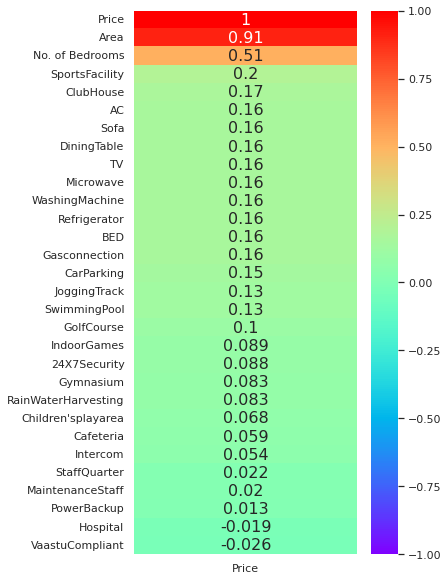

In [ ]:
top_features = train.corr()[['Price']].sort_values(by=['Price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [ ]:
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='Price', data=train, ax=ax[0])
        sns.countplot(train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='Price', data=train, ax=ax[0])
        sns.distplot(train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

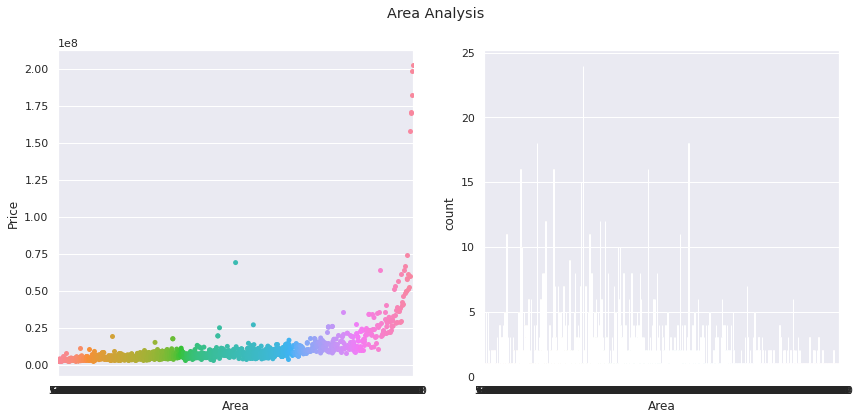

In [ ]:
plot_data('Area',True)

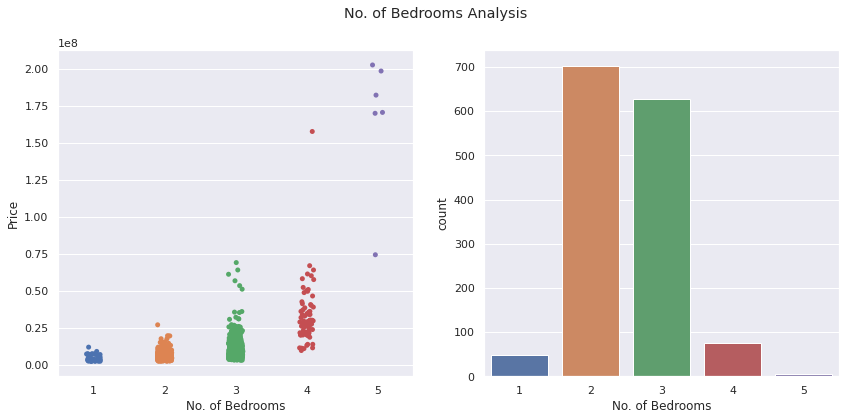

In [ ]:
plot_data('No. of Bedrooms',True)

In [ ]:
train = train.drop(train[(train['No. of Bedrooms'] == 5) & (train['Price'] < 1.75)].index)

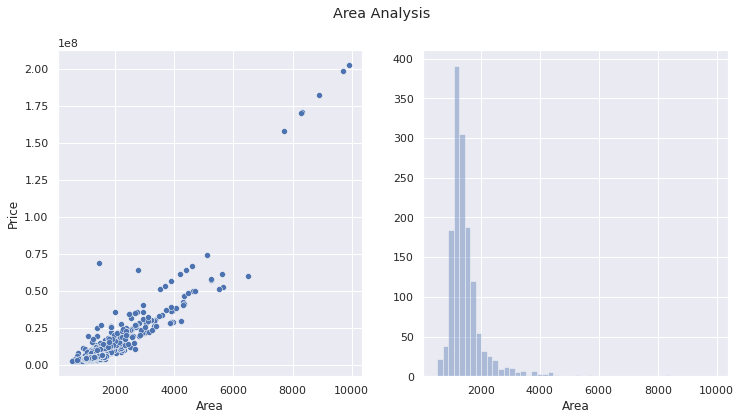

In [ ]:
plot_data('Area')

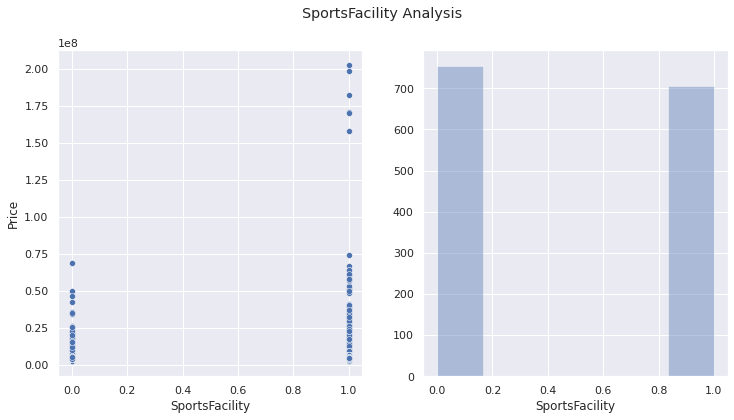

In [ ]:
plot_data('SportsFacility')

In [ ]:
train = train.drop(train[(train['Area'] > 8000) & (train['Price'] < 1.75)].index)

Isolation Forest Algorithm

In [ ]:
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 543
Number of rows without outliers: 917


In [ ]:
train.reset_index()

,index,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,0,30000000,3340,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,7888000,1045,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,2,4866000,1179,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,3,6845000,1670,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,4,6797000,1220,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,912,4500000,1000,2,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
913,913,4400000,1000,2,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
914,914,15200000,1792,3,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
915,915,25600000,3012,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
X = train.copy()
X.drop(['Price'],axis=1,inplace=True) # Dropped the y feature
y = train['Price'].values

We would use Random Search Algorithm from Keras for hyper-parameter tuning of the model.

In [ ]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=3,
    directory='model_dir',
    project_name='House_Price_Prediction')

In [ ]:
tuner.search(X[500:],y[500:],batch_size=128,epochs=200,validation_data=(X[:500],y[:500]))

Trial 10 Complete [00h 01m 23s]
val_mse: 7339324735488.0

Best val_mse So Far: 7339324735488.0
Total elapsed time: 00h 15m 00s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.get_best_models(1)[0]

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mse')
    return model
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 320)               12480     
                                                                 
 dense_6 (Dense)             (None, 384)               123264    
                                                                 
 dense_7 (Dense)             (None, 352)               135520    
                                                                 
 dense_8 (Dense)             (None, 448)               158144    
                                                                 
 dense_9 (Dense)             (None, 160)               71840     
                                                                 
 dense_10 (Dense)            (None, 160)               25760     
                                                                 
 dense_11 (Dense)            (None, 32)               

Epoch 1/1000
7/7 [==============================] - 1s 42ms/step - loss: 81630215536640.0000 - val_loss: 40867091972096.0000
Epoch 2/1000
7/7 [==============================] - 0s 17ms/step - loss: 81629125017600.0000 - val_loss: 40866223751168.0000
Epoch 3/1000
7/7 [==============================] - 0s 17ms/step - loss: 81627757674496.0000 - val_loss: 40864927711232.0000
Epoch 4/1000
7/7 [==============================] - 0s 18ms/step - loss: 81625601802240.0000 - val_loss: 40862755061760.0000
Epoch 5/1000
7/7 [==============================] - 0s 17ms/step - loss: 81621793374208.0000 - val_loss: 40859085045760.0000
Epoch 6/1000
7/7 [==============================] - 0s 17ms/step - loss: 81615636135936.0000 - val_loss: 40852881670144.0000
Epoch 7/1000
7/7 [==============================] - 0s 17ms/step - loss: 81605032935424.0000 - val_loss: 40842471407616.0000
Epoch 8/1000
7/7 [==============================] - 0s 18ms/step - loss: 81587316195328.0000 - val_loss: 40825140543488.0000


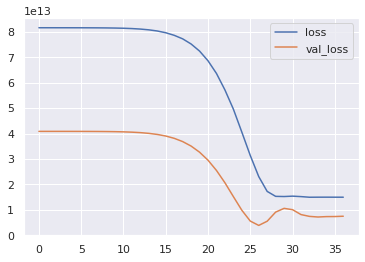

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X,y=y,
          validation_split=0.1,
          batch_size=128,epochs=1000, callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)
losses.plot()

Epoch 1/170
8/8 [==============================] - 1s 13ms/step - loss: 77540794302464.0000
Epoch 2/170
8/8 [==============================] - 0s 13ms/step - loss: 77539661840384.0000
Epoch 3/170
8/8 [==============================] - 0s 13ms/step - loss: 77538034450432.0000
Epoch 4/170
8/8 [==============================] - 0s 13ms/step - loss: 77535123603456.0000
Epoch 5/170
8/8 [==============================] - 0s 13ms/step - loss: 77529956220928.0000
Epoch 6/170
8/8 [==============================] - 0s 13ms/step - loss: 77520972021760.0000
Epoch 7/170
8/8 [==============================] - 0s 13ms/step - loss: 77504412909568.0000
Epoch 8/170
8/8 [==============================] - 0s 15ms/step - loss: 77475421880320.0000
Epoch 9/170
8/8 [==============================] - 0s 13ms/step - loss: 77424343646208.0000
Epoch 10/170
8/8 [==============================] - 0s 13ms/step - loss: 77337882263552.0000
Epoch 11/170
8/8 [==============================] - 0s 13ms/step - loss: 771881

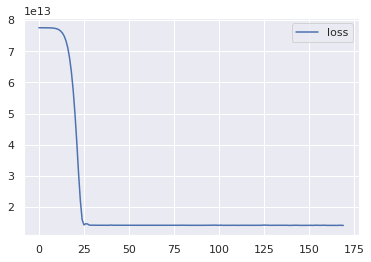

In [ ]:
model = create_model() # Resetting the model.
history = model.fit(x=X,y=y,
          batch_size=128,epochs=170)
losses = pd.DataFrame(model.history.history)
losses.plot()